# Dashboard
Análisis de comportamiento de los pitchers de mlb en la temporada 2022

 Importamos las librerias luego de haberlas instalado en la terminal 

In [6]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

In [8]:
import streamlit as st
import pandas as pd

In [9]:
df = pd.read_csv('datap.csv', sep=';', encoding='latin-1')

df

,Rk,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,1,Cory Abbott,26,WSN,NL,0,5,0.000,5.25,16,...,2,216,75,6.36,1.438,8.3,2.3,4.7,8.4,1.80
1,2,Albert Abreu,26,TOT,AL,2,2,0.500,3.26,33,...,6,172,123,4.77,1.474,8.1,1.2,5.1,8.8,1.73
2,3,Albert Abreu,26,TEX,AL,0,0,0.000,3.12,7,...,0,42,133,8.54,1.846,4.2,2.1,12.5,9.3,0.75
3,4,Albert Abreu,26,KCR,AL,0,0,0.000,4.15,4,...,1,22,106,8.19,2.308,12.5,2.1,8.3,6.2,0.75
4,5,Albert Abreu,26,NYY,AL,2,2,0.500,3.16,22,...,5,108,124,2.92,1.208,8.8,0.7,2.1,9.1,4.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,1077,Rob Zastryzny*,30,NYM,NL,0,0,0.000,9.00,1,...,0,4,60,1.11,1.000,9.0,0.0,0.0,9.0,0.00
1077,1078,Rob Zastryzny*,30,LAA,AL,0,0,0.000,6.00,5,...,1,12,76,2.78,1.000,6.0,0.0,3.0,6.0,2.00
1078,1079,Angel Zerpa*,22,KCR,AL,2,1,0.667,1.64,3,...,1,44,255,5.75,1.091,7.4,1.6,2.5,2.5,1.00
1079,1080,T.J. Zeuch,26,CIN,NL,0,3,0.000,15.19,3,...,0,64,30,11.08,2.906,20.3,4.2,5.9,4.2,0.71


In [10]:
print(len(df.columns))
df.columns.tolist()   # Te dice cuántas columnas tiene

35


['Rk',
 'Name',
 'Age',
 'Tm',
 'Lg',
 'W',
 'L',
 'W-L%',
 'ERA',
 'G',
 'GS',
 'GF',
 'CG',
 'SHO',
 'SV',
 'IP',
 'H',
 'R',
 'ER',
 'HR',
 'BB',
 'IBB',
 'SO',
 'HBP',
 'BK',
 'WP',
 'BF',
 'ERA+',
 'FIP',
 'WHIP',
 'H9',
 'HR9',
 'BB9',
 'SO9',
 'SO/W']

In [11]:

# Verificamos si hay valores nulos
st.write(df.isnull().sum())
# Eliminamos filas con valores nulos
df.dropna(inplace=True)
st.write(df.isnull().sum())
st.write(df.shape)
# Reiniciamos el índice después de eliminar filas
df.reset_index(drop=True, inplace=True)
st.write(df.shape)
st.write(df.head())



2025-10-22 21:49:31.257 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2025-10-22 21:49:31.416 
  command:

    streamlit run C:\Users\Windows 11\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-10-22 21:49:31.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:31.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:31.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:31.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:31.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:31.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:31.429 Thread 'MainThread': missing ScriptRunContext! This warning can 

In [12]:
df

,Rk,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,1,Cory Abbott,26,WSN,NL,0,5,0.000,5.25,16,...,2,216,75,6.36,1.438,8.3,2.3,4.7,8.4,1.80
1,2,Albert Abreu,26,TOT,AL,2,2,0.500,3.26,33,...,6,172,123,4.77,1.474,8.1,1.2,5.1,8.8,1.73
2,3,Albert Abreu,26,TEX,AL,0,0,0.000,3.12,7,...,0,42,133,8.54,1.846,4.2,2.1,12.5,9.3,0.75
3,4,Albert Abreu,26,KCR,AL,0,0,0.000,4.15,4,...,1,22,106,8.19,2.308,12.5,2.1,8.3,6.2,0.75
4,5,Albert Abreu,26,NYY,AL,2,2,0.500,3.16,22,...,5,108,124,2.92,1.208,8.8,0.7,2.1,9.1,4.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,1077,Rob Zastryzny*,30,NYM,NL,0,0,0.000,9.00,1,...,0,4,60,1.11,1.000,9.0,0.0,0.0,9.0,0.00
1077,1078,Rob Zastryzny*,30,LAA,AL,0,0,0.000,6.00,5,...,1,12,76,2.78,1.000,6.0,0.0,3.0,6.0,2.00
1078,1079,Angel Zerpa*,22,KCR,AL,2,1,0.667,1.64,3,...,1,44,255,5.75,1.091,7.4,1.6,2.5,2.5,1.00
1079,1080,T.J. Zeuch,26,CIN,NL,0,3,0.000,15.19,3,...,0,64,30,11.08,2.906,20.3,4.2,5.9,4.2,0.71


Filtro para rango de edad vs entradas lanzadas 

In [13]:
# Seleccionar solo las columnas que necesitas
columnas_necesarias = ['Name', 'Tm', 'IP', 'ERA', 'WHIP', 'Age']
df_filtrado = df[columnas_necesarias]

# Mostrar las primeras filas para verificar
print(df_filtrado.head())

           Name   Tm    IP   ERA   WHIP  Age
0   Cory Abbott  WSN  48.0  5.25  1.438   26
1  Albert Abreu  TOT  38.2  3.26  1.474   26
2  Albert Abreu  TEX   8.2  3.12  1.846   26
3  Albert Abreu  KCR   4.1  4.15  2.308   26
4  Albert Abreu  NYY  25.2  3.16  1.208   26


In [14]:
#Filtro de rango de edad con innings lanzados mayor a 50
df_limpio = df_filtrado[
    (df_filtrado['Age'] >= 20) &
    (df_filtrado['Age'] <= 50) &
    (df_filtrado['IP'] > 50)
]
df.reset_index(drop=True, inplace=True)
df_limpio

,Name,Tm,IP,ERA,WHIP,Age
5,Bryan Abreu,HOU,60.1,1.94,1.177,25
6,Domingo Acevedo,OAK,67.2,3.33,0.990,28
7,Jason Adam,TBR,63.1,1.56,0.758,30
9,Joan Adon,WSN,64.2,7.10,1.778,23
12,Keegan Akin*,BAL,81.2,3.20,1.090,27
...,...,...,...,...,...,...
1054,Alex Wood*,SFG,130.2,5.10,1.240,31
1056,Brandon Woodruff,MIL,153.1,3.05,1.070,29
1059,Kyle Wright,ATL,180.1,3.19,1.159,26
1065,Ryan Yarbrough*,TBR,80.0,4.50,1.375,30


Esto se hace para centrar el dataset y aislar datos atipicos 

In [15]:
#Quiero saber cual es el pitcher mas joven y el mas viejo
pitcher_mas_joven = df.loc[df['Age'].idxmin()]
pitcher_mas_viejo = df.loc[df['Age'].idxmax()]
st.write("Pitcher más joven:")
st.write(pitcher_mas_joven)
st.write("Pitcher más viejo:")      
st.write(pitcher_mas_viejo)
st.write(df['Age'].min())   
st.write(df['Age'].max())


2025-10-22 21:49:31.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:31.565 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:31.565 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:31.565 Serialization of dataframe to Arrow table was unsuccessful. Applying automatic fixes for column types to make the dataframe Arrow-compatible.
Traceback (most recent call last):
  File "c:\Users\Windows 11\AppData\Local\Programs\Python\Python312\Lib\site-packages\streamlit\dataframe_util.py", line 822, in convert_pandas_df_to_arrow_bytes
    table = pa.Table.from_pandas(df)
            ^^^^^^^^^^^^^^^^^^^^^^^^
  File "pyarrow\\table.pxi", line 4795, in pyarrow.lib.Table.from_pandas
  File "c:\Users\Windows 11\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyarrow\pandas_compat.py",

In [16]:
df['Categoria'] = df['Age'].apply(lambda x: 'Veterano' if x > 30 else 'Joven')
df.to_csv('2022 MLB Player Stats - Pitching.csv', index=False)
df['Categoria']
# resumen de cuantos pitchers hay en cada categoria
(df['Categoria'].value_counts())


Categoria
Joven       787
Veterano    294
Name: count, dtype: int64

In [17]:
#Barra lateral de streamlit para seleccionar equipo y columnas estadísticas
st.title("📊 Estadísticas de Jugadores por Equipo")

# 🎯 Selección de equipo
equipos = df_limpio['Tm'].unique()
equipo_seleccionado = st.sidebar.selectbox("Selecciona un equipo", equipos)

# 🧩 Selección de columnas estadísticas
columnas_disponibles = df_limpio.columns.drop(['Name', 'Tm'])  # Excluye nombre y equipo
columnas_seleccionadas = st.sidebar.multiselect(
    "Selecciona estadísticas a mostrar",
    columnas_disponibles,
    default=columnas_disponibles  # Opcional: mostrar todas por defecto
)

# 📌 Filtrar DataFrame por equipo
df_equipo = df_limpio[df_limpio['Tm'] == equipo_seleccionado][['Name'] + columnas_seleccionadas]

# Mostrar resultados
st.subheader(f"Jugadores del equipo {equipo_seleccionado}")
st.dataframe(df_equipo.reset_index(drop=True))


2025-10-22 21:49:31.631 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:31.632 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:31.632 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:31.632 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:31.632 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:31.632 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:31.632 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:31.632 Session state does not function when running a script without `streamlit run`
2025-10-22 21:49

DeltaGenerator()

# Gráficos por objetivos 

# Gráfico 1

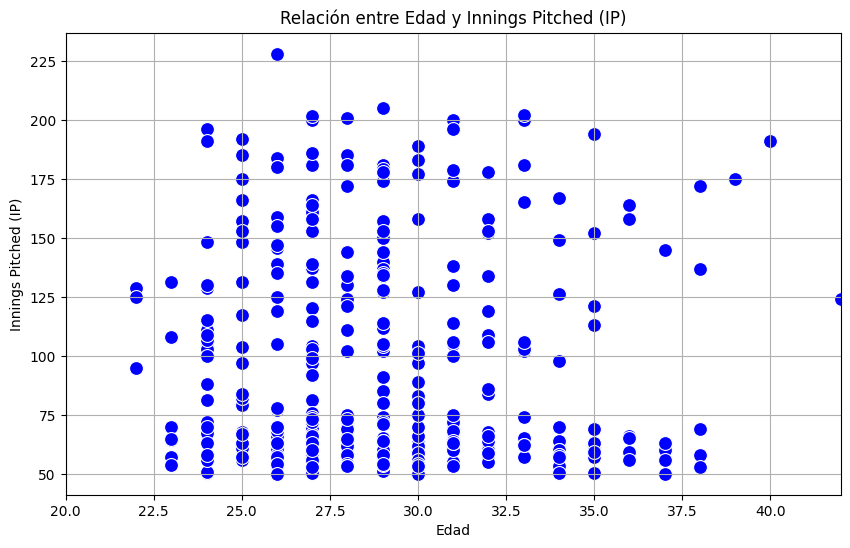

In [18]:
#Grafico objetivo: Relacion Edad vs Innings Pitched (IP)
df_fig1 = df[(df['Age'] > 20) & (df['IP'] > 50)]

# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_fig1, x='Age', y='IP', color='blue', s=100)

# Títulos y etiquetas
plt.title('Relación entre Edad y Innings Pitched (IP)')
plt.xlabel('Edad')
plt.ylabel('Innings Pitched (IP)')

# Estética
plt.grid(True)
plt.xlim(20, 42)

# Mostrar
plt.show()


Luego de ver donde esta la concentracion de juegos pitcheados por edad podriamos ver un rango claro entre 25 y 33 años, donde se concentran los pitchers con mas innings pitcheados 

# Grafico 2

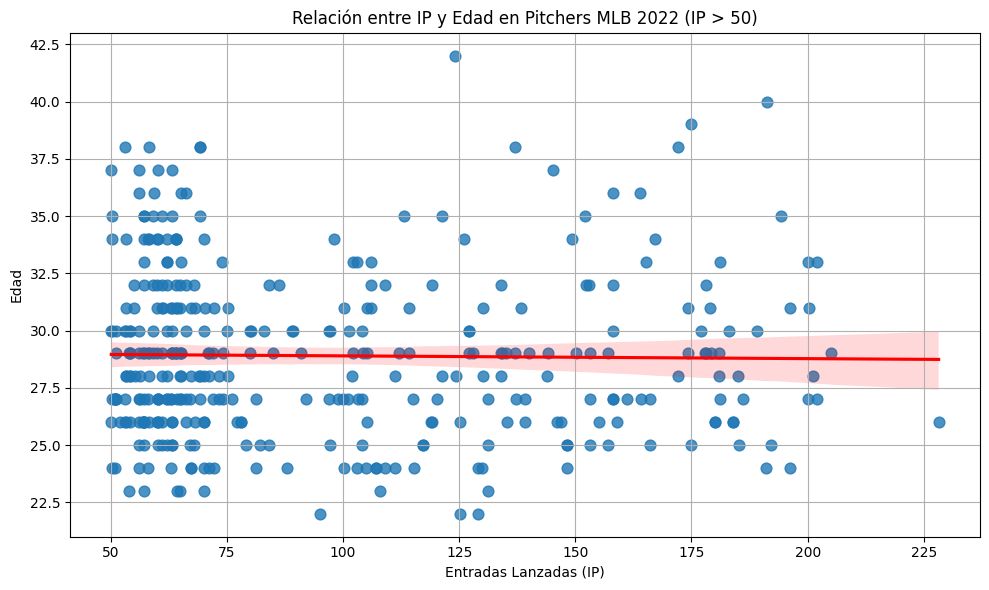

In [19]:
df_filtrado = df[df['IP'] > 50]

# Crear gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(data=df_filtrado, x='IP', y='Age', scatter_kws={'s': 60}, line_kws={'color': 'red'})

# Títulos y etiquetas
plt.title('Relación entre IP y Edad en Pitchers MLB 2022 (IP > 50)')
plt.xlabel('Entradas Lanzadas (IP)')
plt.ylabel('Edad')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 3

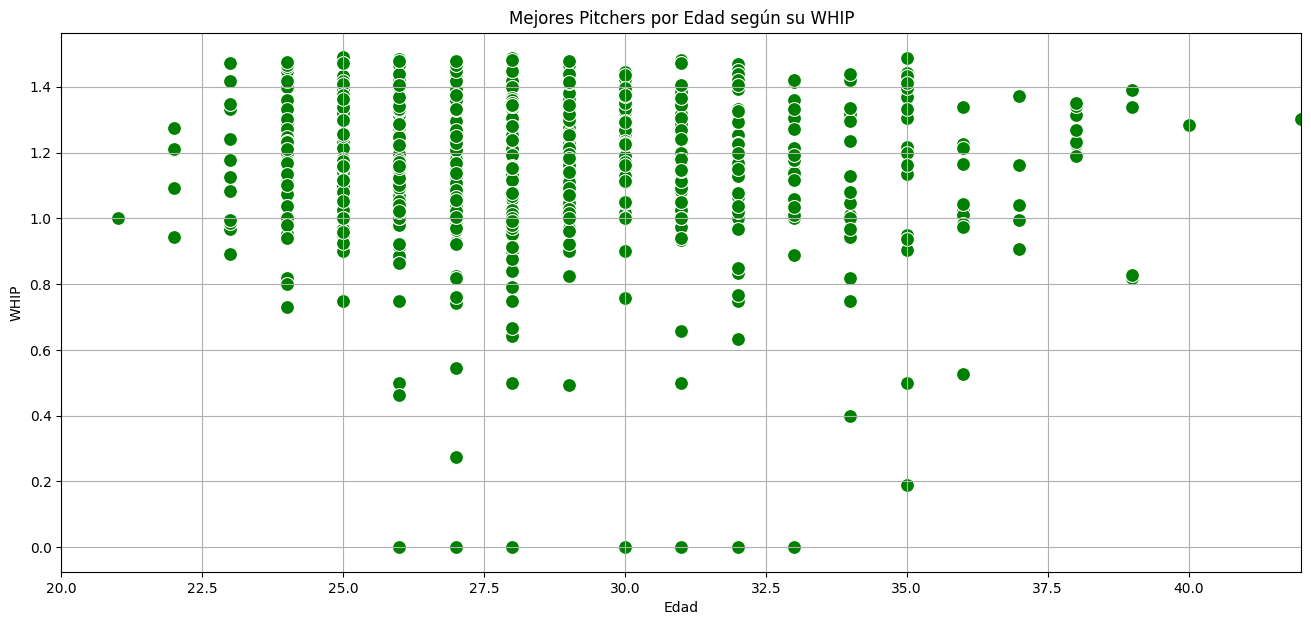

In [20]:
#Grafico objetivo: Rango de mejores pitchers por edad según su whip
df_fig2 = df[(df['Age'] > 20) & (df['WHIP'] < 1.5)]
# Crear gráfico de dispersión
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df_fig2, x='Age', y='WHIP', color='green', s=100)
# Títulos y etiquetas
plt.title('Mejores Pitchers por Edad según su WHIP')
plt.xlabel('Edad')
plt.ylabel('WHIP')
plt.grid(True)
plt.xlim(20, 42)
# Mostrar
plt.show()

Un whip por debajo de 1.00 se considera excelente, mientras que un whip que se encuentra cercano a 1.5 se considera promedio.  Se ve como entre 25 y 35 años se encuentran los pitchers con mejor whip.

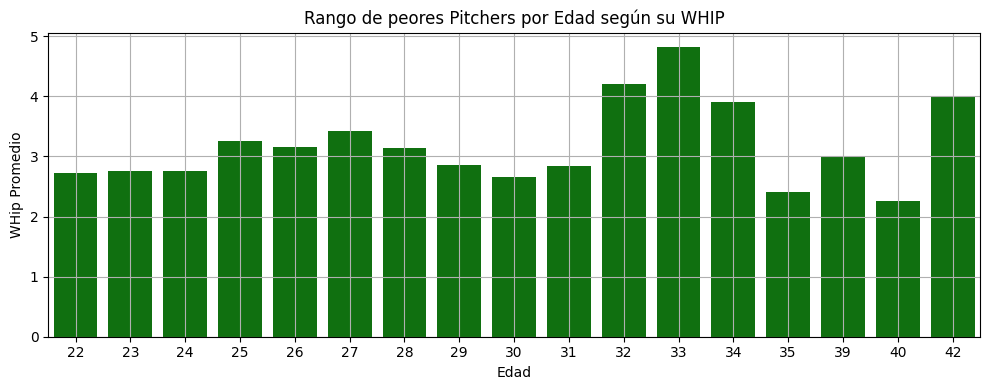

In [21]:
# Filtrar los peores pitchers respecto a su WHIP y edad
df_fig4 = df[(df['Age'] > 20) & (df['WHIP'] > 2.00)]

# Verificar si hay datos
if df_fig4.empty:
    print("No hay datos que cumplan con los criterios seleccionados.")
else:
    # Agrupar por edad y calcular el promedio de ERA
    df_grouped = df_fig4.groupby('Age')['WHIP'].mean().reset_index()

    # Crear gráfico de barras
    plt.figure(figsize=(10 , 4))
    sns.barplot(data=df_grouped, x='Age', y='WHIP', color='Green')

    # Títulos y etiquetas
    plt.title('Rango de peores Pitchers por Edad según su WHIP')
    plt.xlabel('Edad')
    plt.ylabel('WHip Promedio')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

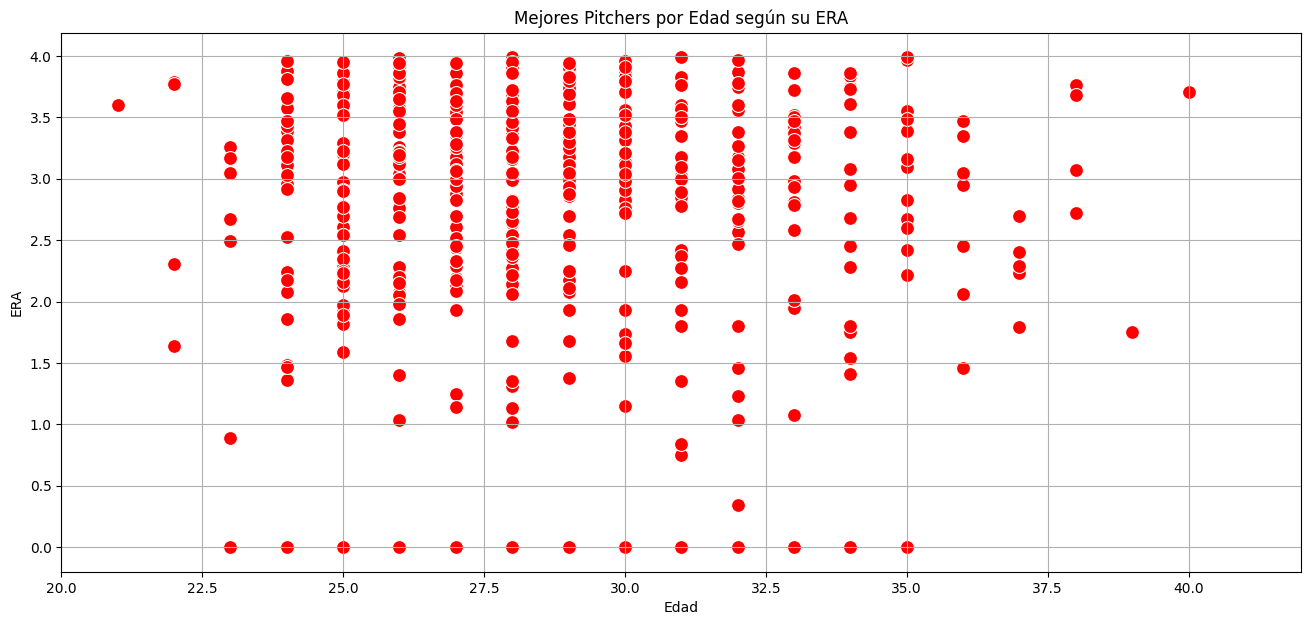

In [22]:
#Rango de mejores pitchers por edad según su ERA
df_fig3 = df[(df['Age'] > 20) & (df['ERA'] < 4.00)]
# Crear gráfico de dispersión       
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df_fig3, x='Age', y='ERA', color='red', s=100)
# Títulos y etiquetas
plt.title('Mejores Pitchers por Edad según su ERA')
plt.xlabel('Edad')
plt.ylabel('ERA')
plt.grid(True)
plt.xlim(20, 42)
# Mostrar
plt.show()

Para la MLB, una ERA por debajo de 4.00 se considera buena, y una por debajo de 3.00 es de nivel élite. Una ERA de 2.00 o menos es excepcional. 

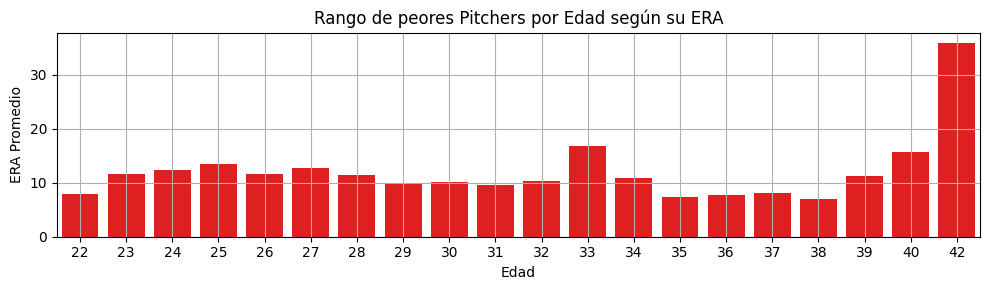

In [23]:
# Filtrar los peores pitchers
df_fig5 = df[(df['Age'] > 20) & (df['ERA'] > 6.00)]

# Verificar si hay datos
if df_fig5.empty:
    print("No hay datos que cumplan con los criterios seleccionados.")
else:
    # Agrupar por edad y calcular el promedio de ERA
    df_grouped = df_fig5.groupby('Age')['ERA'].mean().reset_index()

    # Crear gráfico de barras
    plt.figure(figsize=(10, 3))
    sns.barplot(data=df_grouped, x='Age', y='ERA', color='red')

    # Títulos y etiquetas
    plt.title('Rango de peores Pitchers por Edad según su ERA')
    plt.xlabel('Edad')
    plt.ylabel('ERA Promedio')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Gráfico 4

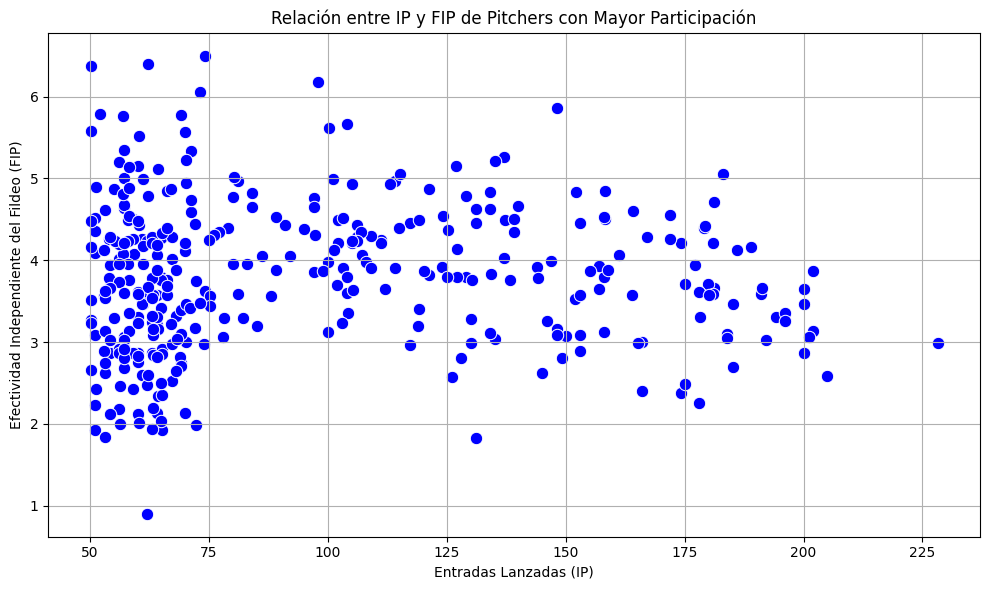

In [24]:
# Filtrar pitchers con mayor participación (por ejemplo, IP > 50)
df_mayor_participacion = df[df['IP'] > 50]

# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_mayor_participacion, x='IP', y='FIP', color='blue', s=80)

# Títulos y etiquetas
plt.title('Relación entre IP y FIP de Pitchers con Mayor Participación')
plt.xlabel('Entradas Lanzadas (IP)')
plt.ylabel('Efectividad Independiente del Fildeo (FIP)')
plt.grid(True)

plt.tight_layout()
plt.show()

El FIP es una métrica avanzada que evalúa el rendimiento de un lanzador sin considerar el impacto de la defensa de su equipo.

In [25]:
# Filtrar si lo deseas (ejemplo: pitchers con más de 50 IP)
df_filtrado = df[df['IP'] > 50]

# Calcular métricas
era_promedio = round(df_filtrado['ERA'].mean(), 2)
fip_promedio = round(df_filtrado['FIP'].mean(), 2)
whip_promedio = round(df_filtrado['WHIP'].mean(), 2)

# Mostrar indicadores
st.subheader("Indicadores de Rendimiento")
col1, col2, col3 = st.columns(3)
col1.metric(label="ERA Promedio", value=era_promedio)
col2.metric(label="FIP Promedio", value=fip_promedio)
col3.metric(label="WHIP Promedio", value=whip_promedio)

2025-10-22 21:49:33.050 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:33.050 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:33.050 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:33.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:33.068 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:33.072 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:33.079 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-22 21:49:33.084 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

# Gráfico 5

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_21112\859317161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mayor_participacion['IP_rango'] = pd.cut(df_mayor_participacion['IP'], bins=[50, 70, 90, 110, 130, 150, 170])


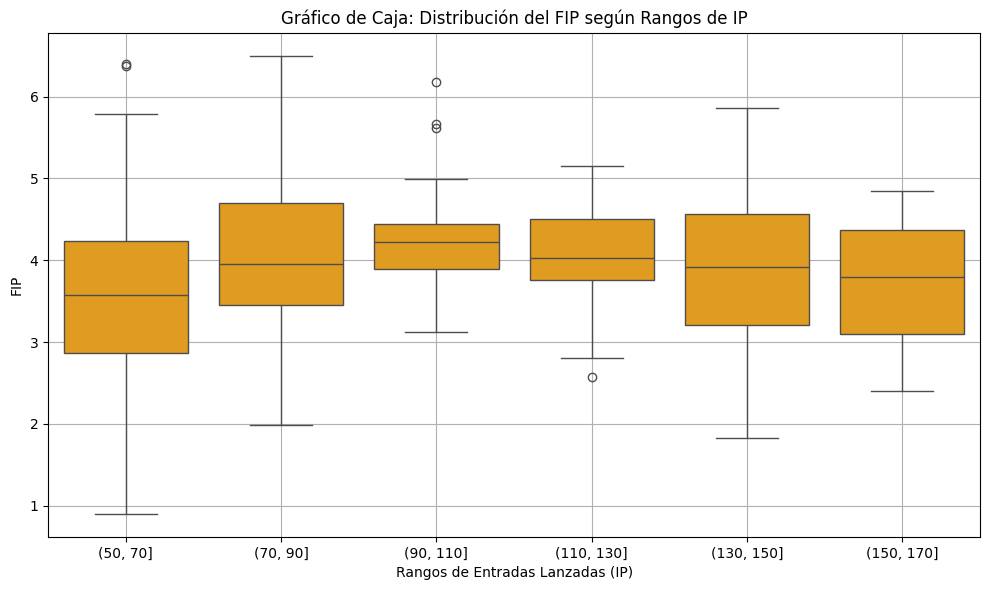

In [26]:
# Filtrar pitchers con IP > 50
df_mayor_participacion = df[df['IP'] > 50]

# Crear rangos (bins) para IP
df_mayor_participacion['IP_rango'] = pd.cut(df_mayor_participacion['IP'], bins=[50, 70, 90, 110, 130, 150, 170])

# Crear gráfico de caja
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_mayor_participacion, x='IP_rango', y='FIP', color='orange')

# Títulos y etiquetas
plt.title('Gráfico de Caja: Distribución del FIP según Rangos de IP')
plt.xlabel('Rangos de Entradas Lanzadas (IP)')
plt.ylabel('FIP')
plt.grid(True)
plt.tight_layout()

# Gráfica 6

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_21112\2546279655.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_control, x='WHIP', y='Name', palette='viridis')


Top 10 Pitchers con Mayor Participación y Mejor WHIP (MLB 2022):
                 Name   Tm     IP   WHIP
338        Zac Gallen  ARI  184.0  0.913
231        Yu Darvish  SDP  194.2  0.950
621  Triston McKenzie  CLE  191.1  0.951
697        Aaron Nola  PHI  205.0  0.961
137     Corbin Burnes  MIL  202.0  0.965
15    Sandy Alcantara  MIA  228.2  0.980
578       Alek Manoah  TOR  196.2  0.992
33    Tyler Anderson*  LAD  178.2  1.002
328        Max Fried*  ATL  185.1  1.014
204       Gerrit Cole  NYY  200.2  1.017


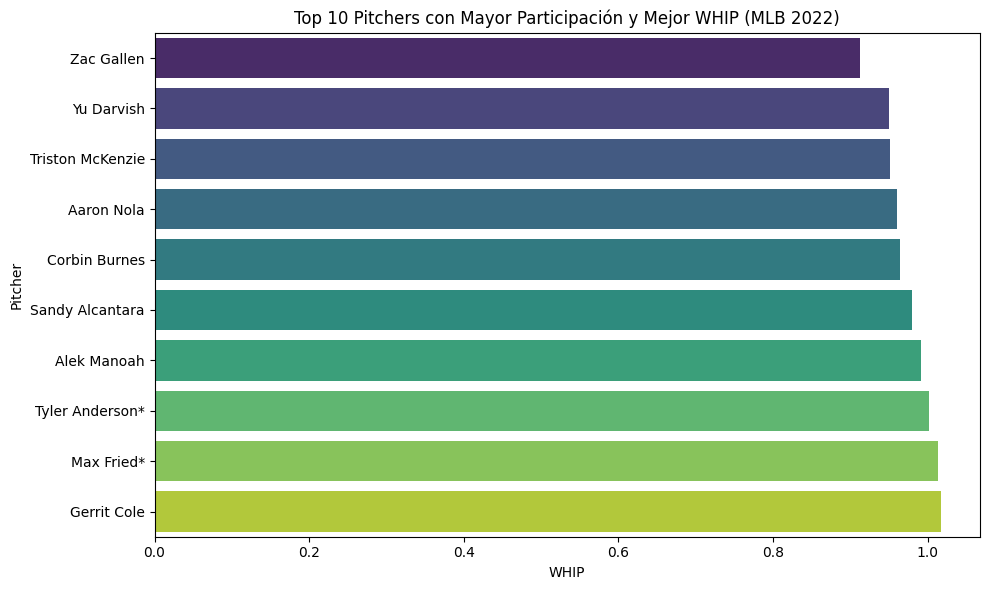

In [27]:
# Filtrar los pitchers con mayor participación (IP más alto)
df_top_ip = df.sort_values(by='IP', ascending=False).head(30)  # puedes ajustar el número si lo deseas

# Ordenar por WHIP para encontrar los más eficientes entre los más duraderos
df_top_control = df_top_ip.sort_values(by='WHIP', ascending=True).head(10)

# Mostrar tabla con los pitchers más eficientes
print("Top 10 Pitchers con Mayor Participación y Mejor WHIP (MLB 2022):")
print(df_top_control[['Name', 'Tm', 'IP', 'WHIP']])

# Visualizar con gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_control, x='WHIP', y='Name', palette='viridis')
plt.title('Top 10 Pitchers con Mayor Participación y Mejor WHIP (MLB 2022)')
plt.xlabel('WHIP')
plt.ylabel('Pitcher')
plt.tight_layout()
plt.show()


C:\Users\Windows 11\AppData\Local\Temp\ipykernel_21112\2708703969.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_efectivos, x='ERA', y='Name', palette='mako')


Top 10 Pitchers con Mayor Participación y Mejor ERA (MLB 2022):
                 Name   Tm     IP   ERA
171       Dylan Cease  CHW  184.0  2.20
578       Alek Manoah  TOR  196.2  2.24
15    Sandy Alcantara  MIA  228.2  2.28
328        Max Fried*  ATL  185.1  2.48
338        Zac Gallen  ARI  184.0  2.54
33    Tyler Anderson*  LAD  178.2  2.57
990   Framber Valdez*  HOU  201.1  2.82
97       Shane Bieber  CLE  200.0  2.88
745     Martín Pérez*  TEX  196.1  2.89
1026       Logan Webb  SFG  192.1  2.90


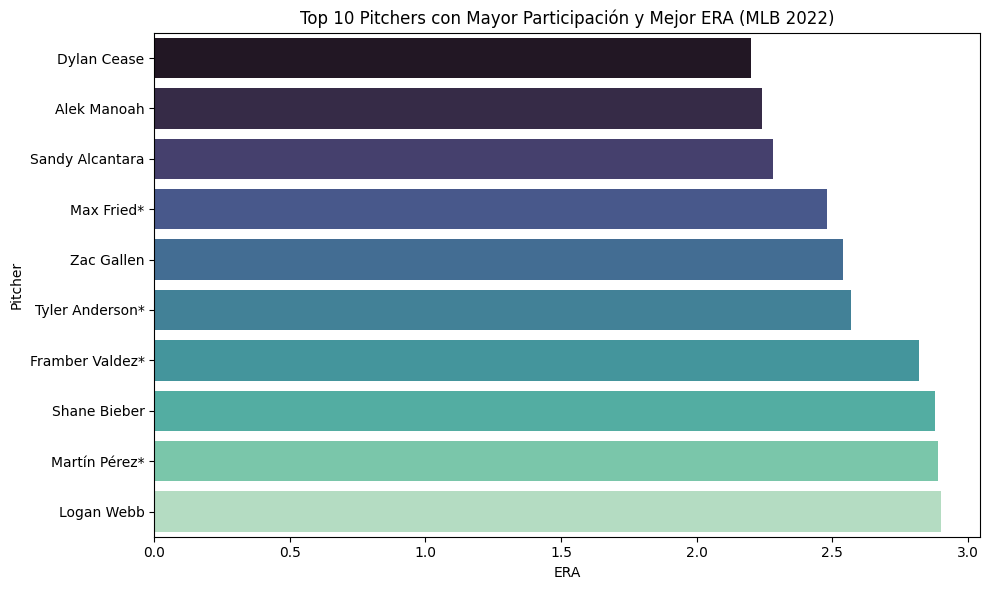

In [28]:
# Filtrar los pitchers con mayor participación (IP más alto)
df_top_ip = df.sort_values(by='IP', ascending=False).head(30)  # puedes ajustar el número si lo deseas

# Ordenar por ERA para encontrar los más efectivos entre los más duraderos
df_top_efectivos = df_top_ip.sort_values(by='ERA', ascending=True).head(10)

# Mostrar tabla con los pitchers más efectivos
print("Top 10 Pitchers con Mayor Participación y Mejor ERA (MLB 2022):")
print(df_top_efectivos[['Name', 'Tm', 'IP', 'ERA']])

# Visualizar con gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_efectivos, x='ERA', y='Name', palette='mako')
plt.title('Top 10 Pitchers con Mayor Participación y Mejor ERA (MLB 2022)')
plt.xlabel('ERA')
plt.ylabel('Pitcher')
plt.tight_layout()
plt.show()